In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,recall_score,f1_score,precision_score
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import re
import string
import unicodedata
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from bs4 import BeautifulSoup

In [3]:
df=pd.read_csv('datasets/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


Cleaning

In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [6]:
df.isnull().any()

text     False
label    False
dtype: bool

In [7]:
df.describe()

,label
count,416809.000000
mean,1.554271
std,1.490453
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [8]:
df['text'].value_counts().sum()

416809

Visualisation

In [9]:
df.duplicated().sum()

686

In [10]:
df.drop_duplicates(inplace=True)

Normalisation de texte

Tokenization

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:

stop_words = nltk.corpus.stopwords.words('english')

In [13]:
def noiseremovel_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub('\[[^]]*\]', '',text)
    return text

In [14]:
df['text'] = df['text'].apply(noiseremovel_text)

In [15]:
#def stemmer(text):
#   ps = nltk.porter.PorterStemmer()
#   text = '.'.join([ps.stem(word) for word in text.split()])
#   return text

In [16]:
#df['text'] = df['text'].apply(stemmer)

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer

# Téléchargement des ressources nécessaires pour la lemmatisation
nltk.download('wordnet')

# Initialisation du lemmatiseur WordNet
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    # Tokenisation des mots dans le texte
    tokens = nltk.word_tokenize(text)
    # Lemmatisation de chaque mot
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Reconstruction du texte à partir des tokens lemmatisés
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
df['text'] = df['text'].apply(lemmatize)

In [19]:
#def preprocess(text):
#    tokens = word_tokenize(text)
#    tokens = [word for word in tokens if word.isalpha()] # ne garder que les mots alphabétiques
#    tokens = [word.lower() for word in tokens] # mettre en minuscule
#    tokens = [word for word in tokens if not word in stop_words] # suppression des mots vides
#    return ' '.join(tokens)


In [20]:
#df['text'] = df['text'].apply(preprocess)

In [21]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [22]:
# Séparation des variables indépendantes et de la variable cible
X = df['text']
Y = df['label']

In [23]:
# Create a CountVectorizer instance
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer()


# Convert the text data to bag-of-words features
X_bow = vectorizer.fit_transform(X)

In [24]:
# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, Y, test_size=0.4, random_state=42)

In [25]:
# Initialize the Logistic Regression model
logistic = LogisticRegression()

In [26]:
# Fitting the model on the training data
lr_bow = logistic.fit(X_train, y_train)

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Make predictions on the test data
y_pred = lr_bow.predict(X_test)


In [28]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8987563832982878
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     48164
           1       0.91      0.94      0.92     56283
           2       0.82      0.76      0.79     13807
           3       0.90      0.89      0.90     23008
           4       0.85      0.84      0.85     19164
           5       0.77      0.71      0.74      6024

    accuracy                           0.90    166450
   macro avg       0.87      0.85      0.86    166450
weighted avg       0.90      0.90      0.90    166450



In [29]:
accuracy

0.8987563832982878

In [30]:
f1_score(y_test,y_pred,average='weighted')

0.8980258245860375

In [31]:
precision_score(y_test,y_pred,average='weighted')

0.8977100579685634

In [32]:
recall_score(y_test,y_pred,average='weighted')

0.8987563832982878

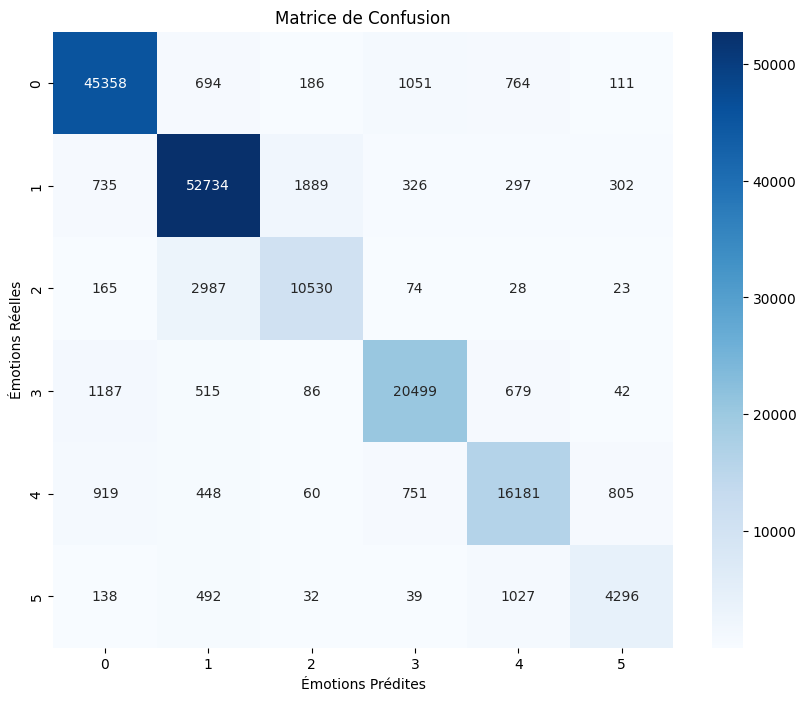

In [33]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Émotions Prédites')
plt.ylabel('Émotions Réelles')
plt.title('Matrice de Confusion')
plt.show()